In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# reproducibility (optional)
tf.random.set_seed(42)
np.random.seed(42)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape : (10000, 28, 28)
y_test shape : (10000,)


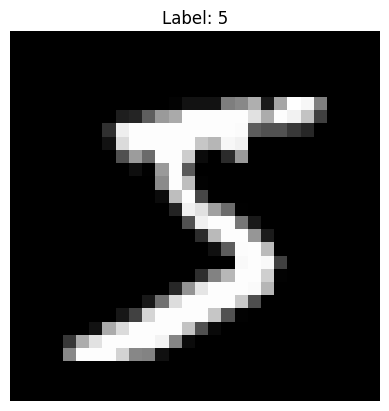

In [33]:
#Step 1 — Load & explore the dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print("x_train shape:", x_train.shape)   # -> (60000, 28, 28)
print("y_train shape:", y_train.shape)   # -> (60000,)
print("x_test shape :", x_test.shape)    # -> (10000, 28, 28)
print("y_test shape :", y_test.shape)    # -> (10000,)

# display first image
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.axis('off')
plt.show()

In [35]:
#Step 2 — Normalize the data
# Show pixel values before normalization (first row of the first image)
print("Before (first row):", x_train[0][0][:10])   # integers 0-255

# Normalize (convert to float32 and scale 0..1)
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32')  / 255.0

print("After (first row):", x_train[0][0][:10])    # floats 0.0-1.0

Before (first row): [0 0 0 0 0 0 0 0 0 0]
After (first row): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [37]:
#Step 3 — Build the model
model = keras.Sequential([
    keras.Input(shape=(28, 28)),      # 👈 define input here
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
#Step 4 — Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [41]:
#Step 5 — Train the model (5 epochs)
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)
train_acc_5 = history.history['accuracy'][-1]
print("Training accuracy after 5 epochs:", train_acc_5)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9267 - loss: 0.2480 - val_accuracy: 0.9673 - val_loss: 0.1107
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9684 - loss: 0.1042 - val_accuracy: 0.9743 - val_loss: 0.0841
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9792 - loss: 0.0695 - val_accuracy: 0.9718 - val_loss: 0.0936
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9848 - loss: 0.0510 - val_accuracy: 0.9708 - val_loss: 0.0883
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9876 - loss: 0.0396 - val_accuracy: 0.9717 - val_loss: 0.1010
Training accuracy after 5 epochs: 0.9875925779342651


In [17]:
history10 = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.1)
print("Training acc after 10 epochs:", history10.history['accuracy'][-1])

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9901 - loss: 0.0318 - val_accuracy: 0.9707 - val_loss: 0.1142
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9911 - loss: 0.0258 - val_accuracy: 0.9737 - val_loss: 0.1213
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9925 - loss: 0.0218 - val_accuracy: 0.9742 - val_loss: 0.1118
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9936 - loss: 0.0189 - val_accuracy: 0.9720 - val_loss: 0.1372
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9929 - loss: 0.0204 - val_accuracy: 0.9683 - val_loss: 0.1452
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9951 - loss: 0.0142 - val_accuracy: 0.9742 - val_loss: 0.1258
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9944 - loss: 0.0173 - val_accuracy: 0.9768 - val_loss: 0.1196
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9952 - loss: 0.0143 - 

In [43]:
#Step 6 — Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy:", test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.9681 - loss: 0.1113
Test accuracy: 0.9681000113487244


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
First prediction vector: [5.0172280e-09 1.8712285e-07 1.9052051e-06 5.0603605e-05 1.1662738e-11
 1.4588418e-08 8.0662202e-13 9.9994600e-01 1.1030209e-07 1.1167123e-06]
Predicted label: 7
Actual label   : 7


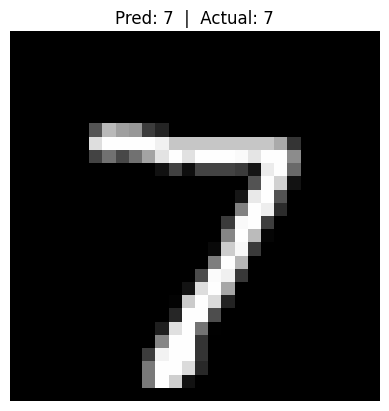

In [45]:
#Step 7 — Make predictions
preds = model.predict(x_test)          # shape (10000, 10) — probabilities per class
print("First prediction vector:", preds[0])   # 10 probabilities
pred_label = np.argmax(preds[0])       # predicted class for first test image
print("Predicted label:", pred_label)
print("Actual label   :", y_test[0])

# Show image with predicted label in title
plt.imshow(x_test[0], cmap='gray')
plt.title(f"Pred: {pred_label}  |  Actual: {y_test[0]}")
plt.axis('off')
plt.show()

In [48]:
# Add one more hidden layer (32 neurons) and retrain
model2 = keras.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),   # new layer
    layers.Dense(10, activation='softmax')
])
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history2 = model2.fit(x_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9218 - loss: 0.2619 - val_accuracy: 0.9683 - val_loss: 0.1134
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9680 - loss: 0.1055 - val_accuracy: 0.9723 - val_loss: 0.0977
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9781 - loss: 0.0724 - val_accuracy: 0.9737 - val_loss: 0.0898
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9826 - loss: 0.0554 - val_accuracy: 0.9735 - val_loss: 0.0993
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9861 - loss: 0.0436 - val_accuracy: 0.9723 - val_loss: 0.1069


In [49]:
#Change optimizer to SGD and compare
model_sgd = keras.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model_sgd.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist_sgd = model_sgd.fit(x_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8236 - loss: 0.6589 - val_accuracy: 0.9245 - val_loss: 0.2833
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9113 - loss: 0.3093 - val_accuracy: 0.9392 - val_loss: 0.2237
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9261 - loss: 0.2572 - val_accuracy: 0.9485 - val_loss: 0.1933
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9353 - loss: 0.2240 - val_accuracy: 0.9545 - val_loss: 0.1722
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9424 - loss: 0.1986 - val_accuracy: 0.9585 - val_loss: 0.1564


In [51]:
#Train with only 1 epoch — what happens
history_1epoch = model.fit(x_train, y_train, epochs=1, validation_split=0.1)
print("Accuracy after 1 epoch:", history_1epoch.history['accuracy'][-1])

1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9898 - loss: 0.0315 - val_accuracy: 0.9732 - val_loss: 0.0999
Accuracy after 1 epoch: 0.9898333549499512


In [54]:
#Change activation from 'relu' to 'tanh'
model_tanh = keras.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128, activation='tanh'),
    layers.Dense(64, activation='tanh'),
    layers.Dense(10, activation='softmax')
])
model_tanh.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_tanh = model_tanh.fit(x_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9197 - loss: 0.2741 - val_accuracy: 0.9618 - val_loss: 0.1289
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9629 - loss: 0.1239 - val_accuracy: 0.9712 - val_loss: 0.0956
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9757 - loss: 0.0816 - val_accuracy: 0.9753 - val_loss: 0.0838
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9840 - loss: 0.0570 - val_accuracy: 0.9752 - val_loss: 0.0816
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9895 - loss: 0.0398 - val_accuracy: 0.9782 - val_loss: 0.0807


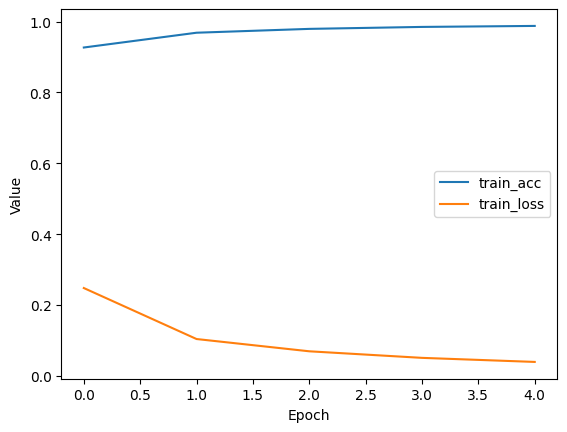

In [55]:
#Plot training accuracy vs epoch
# example using history from a training run (history or history2 etc.)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['loss'], label='train_loss')   # optional
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()

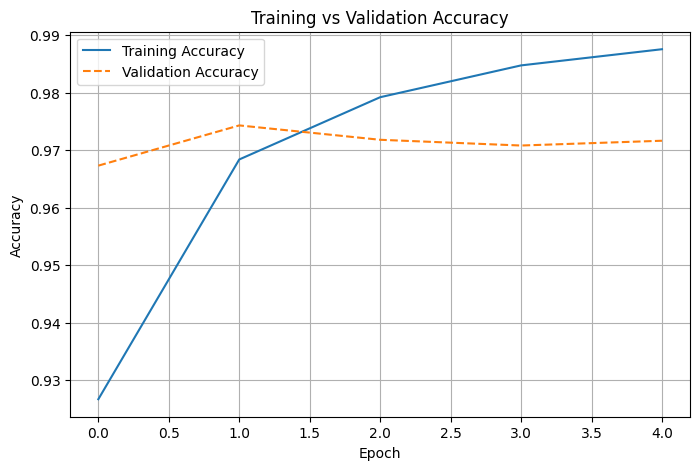

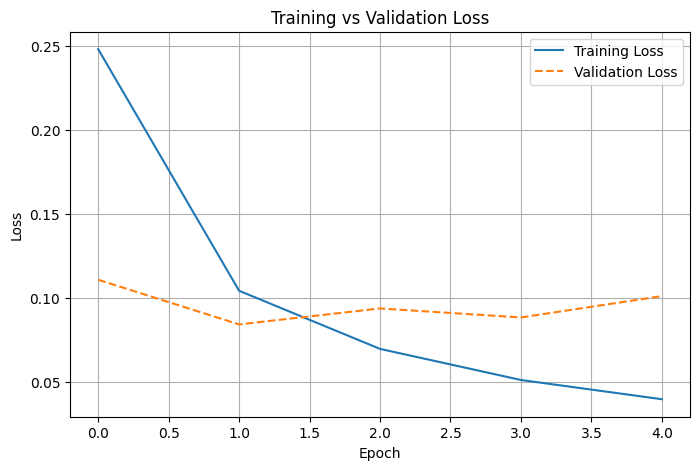

In [58]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='--')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss plot
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()